<a href="https://colab.research.google.com/github/aksha1234/Research-project/blob/main/CE272_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('first-assignment')
jovian.set_colab_id('1kCCoCDfUNcZtvM9SV4nztOdxG-Ulb-Fi')

     |████████████████████████████████| 68 kB 3.8 MB/s 


# Assignment - 2


In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="first-assignment")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/akkikadwe/first-assignment


'https://jovian.ai/akkikadwe/first-assignment'

In [5]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline


## Importing the data for loop detectors excel files

In [24]:
df=pd.read_excel('/content/e1Detector_e3_0_2_2time.xlsx',skiprows=1)

In [25]:
df

,/@xsi:noNamespaceSchemaLocation,/interval/@begin,/interval/@end,/interval/@flow,/interval/@harmonicMeanSpeed,/interval/@id,/interval/@length,/interval/@nVehContrib,/interval/@nVehEntered,/interval/@occupancy,/interval/@speed
0,http://sumo.dlr.de/xsd/det_e1_file.xsd,0,120,0.00,-1.00,e1Detector_e3_0_2,-1,0,0,0.00,-1.00
1,http://sumo.dlr.de/xsd/det_e1_file.xsd,120,240,330.00,6.79,e1Detector_e3_0_2,5,11,11,6.75,6.89
2,http://sumo.dlr.de/xsd/det_e1_file.xsd,240,360,540.00,3.71,e1Detector_e3_0_2,5,18,18,20.22,5.55
3,http://sumo.dlr.de/xsd/det_e1_file.xsd,360,480,420.00,0.75,e1Detector_e3_0_2,5,14,14,77.65,3.90
4,http://sumo.dlr.de/xsd/det_e1_file.xsd,480,600,270.00,0.44,e1Detector_e3_0_2,5,9,9,84.66,1.98
...,...,...,...,...,...,...,...,...,...,...,...
59,http://sumo.dlr.de/xsd/det_e1_file.xsd,7080,7200,300.00,0.42,e1Detector_e3_0_2,5,10,10,83.75,2.78
60,http://sumo.dlr.de/xsd/det_e1_file.xsd,7200,7320,360.00,0.66,e1Detector_e3_0_2,5,12,12,80.24,2.91
61,http://sumo.dlr.de/xsd/det_e1_file.xsd,7320,7440,270.00,0.41,e1Detector_e3_0_2,5,9,8,85.02,1.17
62,http://sumo.dlr.de/xsd/det_e1_file.xsd,7440,7560,540.00,1.07,e1Detector_e3_0_2,5,18,19,70.39,2.94


## Cleaning the Table

In [26]:
cols=df.columns.tolist()

In [27]:
## Taking the important columns in to consideraions
imp_cols=cols[1:5]
imp_cols

['/interval/@begin',
 '/interval/@end',
 '/interval/@flow',
 '/interval/@harmonicMeanSpeed']

In [28]:
df=df[imp_cols]

In [29]:
## Relacing the names of teh columns
df.columns=['begin','end','flow','speed']

In [30]:
## REplacing the negative velocity with the very minimal speed
df=df.replace({'speed':-1},0.00001)

In [31]:
## Now by deleting the first and the last rows
#df=df.drop(index=[0,64],axis=0)

In [32]:
df.head()

,begin,end,flow,speed
0,0,120,0.0,0.00001
1,120,240,330.0,6.79000
2,240,360,540.0,3.71000
3,360,480,420.0,0.75000
4,480,600,270.0,0.44000


In [33]:
## Deriving teh density
df['density']=df['flow']/df['speed']

In [39]:
matplotlib.rcParams['figure.figsize']=(15,15)
sns.set_style('darkgrid')

In [40]:
def polyfit(x,y,degree,title,xlabel,ylabel):
  f=np.poly1d(np.polyfit(x,y,degree))
  X_=np.linspace(x.min(),x.max(),2000)
  Y_=f(X_)
  plt.figure(figsize=(10,8))
  plt.plot(X_,Y_,'b-')
  plt.scatter(x,y,c='red')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  
  plt.savefig(str(xlabel) +str(' vs ')+str(ylabel)+str('.jpg'))

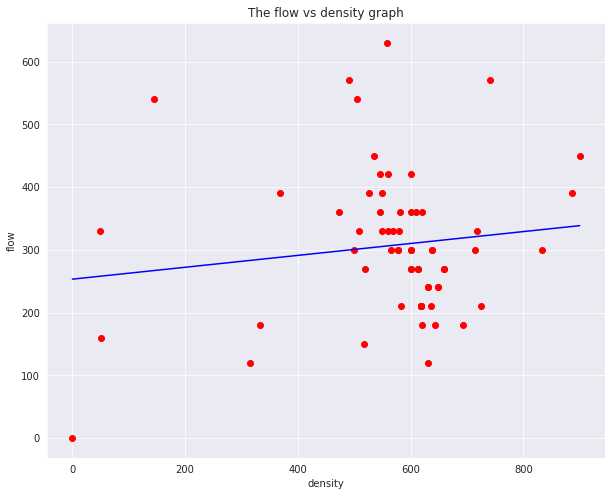

In [41]:
polyfit(df.density,df.flow,1, 'The flow vs density graph','density','flow')

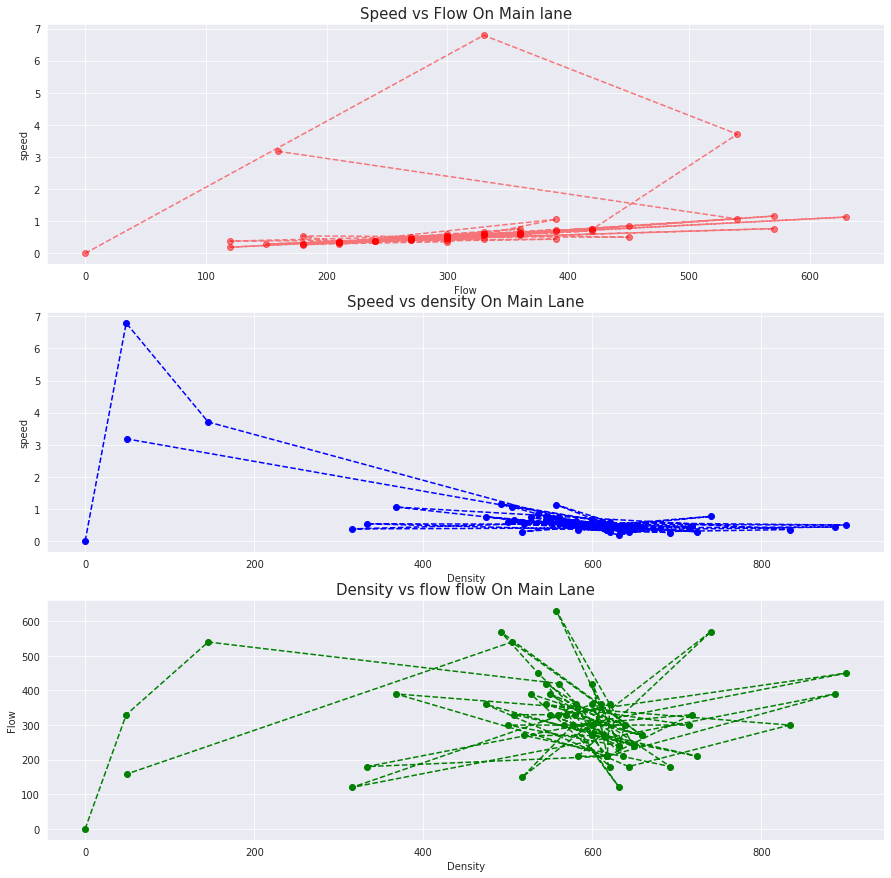

In [42]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(3, 1)  
# For speed-densiity
axis[0].plot(df.flow,df.speed,'ro--',alpha=0.5)
axis[0].set_title("Speed vs Flow On Main lane",fontsize=15)
axis[0].set_xlabel("Flow")
axis[0].set_ylabel("speed")
  
#Speed vs density
axis[1].plot(df.density, df.speed,'bo--')
axis[1].set_title("Speed vs density On Main Lane",fontsize=15)
axis[1].set_xlabel("Density")
axis[1].set_ylabel("speed")
  
# Density vs flow
axis[2].plot(df.density,df.flow,'go--')
axis[2].set_title("Density vs flow flow On Main Lane",fontsize=15)
axis[2].set_xlabel("Density")
axis[2].set_ylabel("Flow")

plt.savefig('pic_line2.jpg')    
# Combine all the operations and display
plt.show()

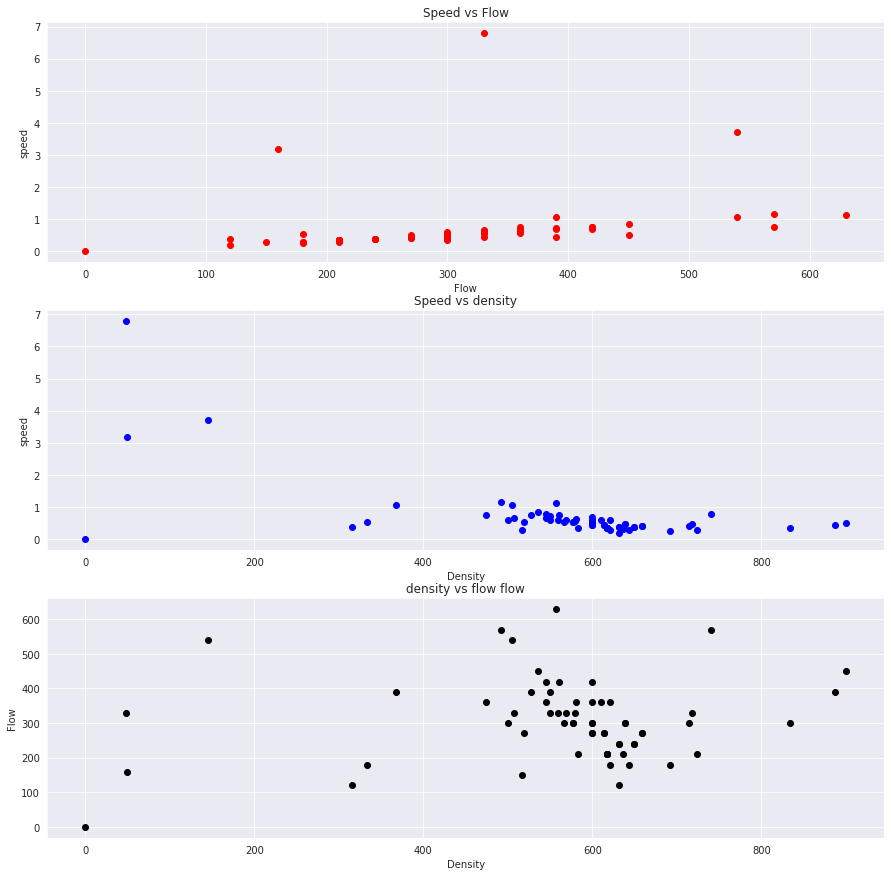

In [43]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(3, 1)
  
# For speed-density
axis[0].scatter(df.flow,df.speed,c='red')
axis[0].set_title("Speed vs Flow")
axis[0].set_xlabel("Flow")
axis[0].set_ylabel("speed")
  
# For Speed vs density
axis[1].scatter(df.density, df.speed,c='blue')
axis[1].set_title("Speed vs density")
axis[1].set_xlabel("Density")
axis[1].set_ylabel("speed")
  
# For Density vf flow
axis[2].scatter(df.density,df.flow,c='black')
axis[2].set_title("density vs flow flow")
axis[2].set_xlabel("Density")
axis[2].set_ylabel("Flow")

plt.savefig('pic_scatter.jpg')    
# Combine all the operations and display
plt.show()

## Plotting the trajectory

In [7]:

df=pd.read_excel('/content/New Microsoft Excel Worksheet.xlsx')

In [10]:
cols=df.columns.tolist()

In [11]:
cols

['edge.lane.vehicle.Attribute:id',
 'edge.lane.vehicle.Attribute:pos',
 'edge.lane.vehicle.Attribute:speed',
 'edge.lane.Attribute:id',
 'edge.Attribute:id',
 'Attribute:time']

In [12]:
df=df[['edge.lane.vehicle.Attribute:pos','edge.lane.Attribute:id','Attribute:time']]

In [13]:
df.columns=['position','lane_id','time']

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df

,position,lane_id,time
0,5.10,e1_0,0
1,5.10,e1_1,0
2,5.10,e3_0,0
3,7.44,e1_0,1
4,7.13,e1_1,1
...,...,...,...
1048570,1.57,e2_0,3217
1048571,57.77,e2_0,3217
1048572,75.83,e2_0,3217
1048573,94.71,e2_0,3217


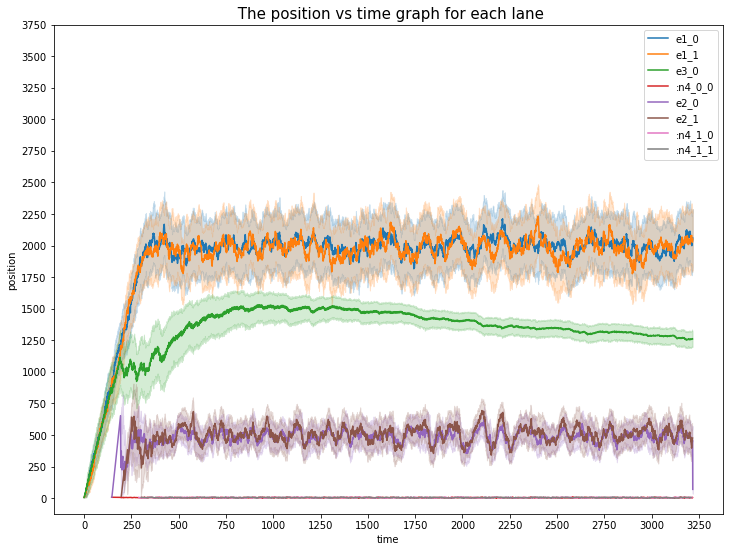

In [23]:
plt.figure(figsize=(12,9))
sns.lineplot(data=df,x='time',y='position',hue='lane_id')
plt.title(' The position vs time graph for each lane',fontsize=15)
plt.xticks(np.arange(0,3500,250))
plt.yticks(np.arange(0,4000,250))
plt.legend(loc='upper right')
plt.savefig('pos_vs_time.jpg')


In [44]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/akkikadwe/first-assignment


'https://jovian.ai/akkikadwe/first-assignment'